# TensorFlow Classification of images

# Step 1: Import the basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Step 2: Load the dataset to the platform

The Pandas library has an easy way to load in data, read_csv()
This dataset comes when it is already split to train and test data

In [4]:
PhoneData = pd.read_csv("./datasets/Phones_train.csv")

In order to view the data, how they are arranged we can use the head() function which shows the first 5 rows of data. To see the last five we use iris.head(-5)

In [3]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

## Step2: Preprocessing and Data Cleaning 
This data has is seems clean. Lets check if there are null entries

In [6]:
print(PhoneData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

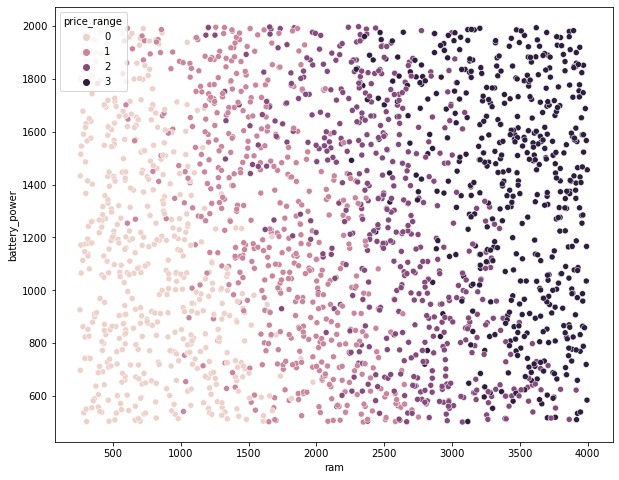

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=PhoneData["ram"], y=PhoneData["battery_power"], hue = PhoneData["price_range"])
plt.show()

# Data Analysis and Visualization

<AxesSubplot:xlabel='count', ylabel='price_range'>

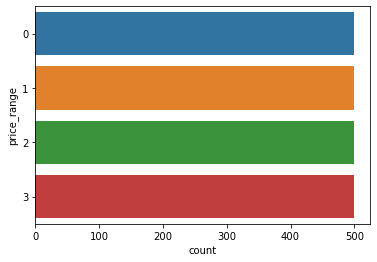

In [8]:

sns.countplot(y = PhoneData["price_range"])

<AxesSubplot:>

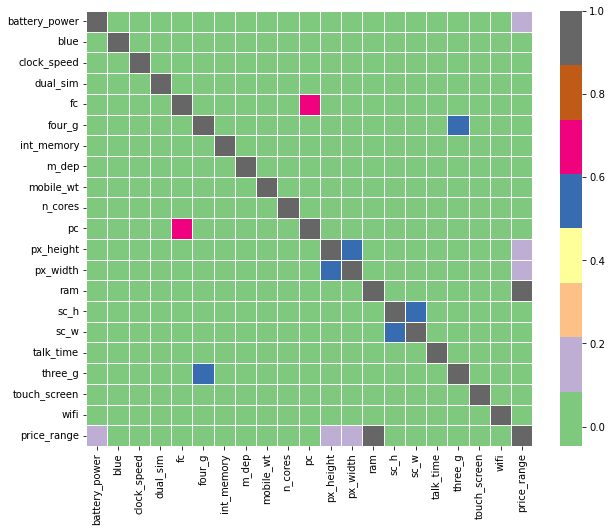

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(PhoneData.corr(), cmap="Accent", linecolor='white', linewidths=1)

<AxesSubplot:xlabel='count', ylabel='dual_sim'>

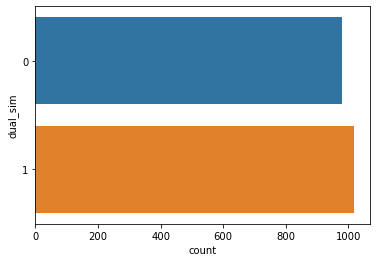

In [10]:
sns.countplot(y = PhoneData["dual_sim"])

From the heatmap we can see that there is a correlation between the ram and the price range. We can therefore plot these two values

## Describe the data
Check the statistics of the dataset with the **describe()** function e.g the mean, max etc

In [11]:
PhoneData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



# Define the inputs and outputs

We now need to define the **features(inputs** and **labels(outputs)**. We can do this easily with pandas by slicing the data table and choosing certain rows/columns.

**input/features** are those characteristics of the data that determines the class that they belong e.g color, lenght, weight etc

**output** is the class that they belong e.g positive/negative, 0/1, hot/cold, present/absent etc

You can achieve this by naming all the column names within a double square parenthesis.

Another way to do this using **iloc()**


In [12]:

# Let's tell the dataframe which column we want for X which is all the columns except 'price_range' column.
#'price_range' column becomes the label for classification

X,y = PhoneData.loc[:, PhoneData.columns != 'price_range'],PhoneData['price_range']

# Split the data to training and testing sets. 
Remember the default percentage is 80% for training and 20% for testing but you can change the percentages using test_size

In [13]:
from sklearn.model_selection import train_test_split
# Split the train data into X and y(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Scale the data first

In [14]:
from sklearn.preprocessing import StandardScaler  # for preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Apply the model

In [15]:
# A function for running any of the models given the model
def run_experiment(model):
    # Fit the model to the training data 
    model.fit(X_train, y_train)
    # Make the prediction
    y_pred = model.predict(X_test)
    return y_pred

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,bootstrap= True,random_state=42)
y_prediction_RFC = run_experiment(RFC)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
y_prediction_logistic = run_experiment(logistic)

## Multi Layer Perceptron (MLP)

In [18]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(random_state=42, max_iter=1000)
y_prediction_MLP = run_experiment(MLP)

# Stochastic Gradient Descent

In [19]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(random_state=42)
y_prediction_SGD = run_experiment(SGD)

#  Gaussian Naive Bayes (GNB)

In [20]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
y_prediction_GNB = run_experiment(GNB)


# Support Vector Machine(SVM)

In [21]:
from sklearn import svm
SVM = svm.SVC()
y_prediction_SVM = run_experiment(GNB)

# XGBoost Classifier

In [22]:
import xgboost as xgb
XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
y_prediction_XGB = run_experiment(XGB)



/Users/ednamilgo/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Predictions from all the models

In [23]:
all_predictions = {'RFC    ':y_prediction_RFC,
                  'Logistic':y_prediction_logistic,
                  'MLP     ':y_prediction_MLP, 
                  'SDG     ':y_prediction_SGD,
                  'GNB     ':y_prediction_GNB,
                  'SVM     ':y_prediction_SVM,
                  'XGB     ':y_prediction_XGB}

# Step 6: Metrics and Scores

There are a number of metrics that can be used to measure the perfomance of a model depending on the type c.f https://scikit-learn.org/stable/modules/model_evaluation.html

For **classification** task like this we will use the following:

    Precision 
    Recall 
    Accuracy 



In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [25]:
model_performance = pd.DataFrame(columns = ["Model Name","accuracy", "precision", "recall"])
# model_performance

In [26]:

def ComparePerformance(model_performance,y_test, y_pred,model_name=None):
    #Accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    # Precision 
    precision = precision_score(y_test,y_pred,average='micro') * 100
    #Recall       
    recall = recall_score(y_test,y_pred,average='micro') * 100

    model_performance = model_performance.append({"Model Name": model_name,
                                                  "accuracy": accuracy,
                                                  "precision": precision,
                                                  "recall": recall},
                                                   ignore_index=True)
    return model_performance

In [27]:
# Display the score for each of the models
for item in all_predictions:
    model_performance = ComparePerformance(model_performance,y_test, all_predictions[item],item)
display(model_performance)
# EMpty the dataframe
model_performance = pd.DataFrame()


,Model Name,accuracy,precision,recall
0,RFC,89.25,89.25,89.25
1,Logistic,97.50,97.50,97.50
2,MLP,94.00,94.00,94.00
3,SDG,79.00,79.00,79.00
4,GNB,79.75,79.75,79.75
5,SVM,79.75,79.75,79.75
6,XGB,90.25,90.25,90.25


In [28]:
phone_categories = pd.DataFrame(columns = ["model","price_range","value","no.of phones"])
phone_categories

,model,price_range,value,no.of phones


In [29]:

# for i in range (0,4):
    
#     for item in all_predictions:
#         (unique, counts) = np.unique(all_predictions[item], return_counts=True)
#         unique = np.unique(all_predictions[item])


#         if unique[i]==0: value='cheap'
#         elif unique[i]==1:
#             value="moderate price"
#         elif unique[i]==3:
#             value="Quite Expensive"
#         else:
#             value="Very Expensive"
        
#         modelname= list(all_predictions.keys())[i]
#         phone_categories = phone_categories.append({"model": item,
#                                                 "price_range": i,
#                                                 "value": value,
#                                                 "no.of phones": counts[i]},
#                                                    ignore_index=True)
#     display(phone_categories)
#     phone_categories=pd.DataFrame()#to clear the dataframe
        
    


# Saving the Model
### Serializing and deserializing a model
Serialization is the process of saving a model.

In [30]:
import pickle as pkl  
   
# Save the trained model as a pickle string.  
with open('./saved_models/logistic2.pkl', 'wb') as f:
    pkl.dump(logistic, f)
    
   
# Loading the pickled model  
 
with open('./saved_models/logistic2.pkl', 'rb') as f:
    logistic_from_pkl = pkl.load(f)

# test the retrieved model
logistic_predict = logistic_from_pkl.predict(X_test) 
accuracy = accuracy_score(y_test, logistic_predict) * 100
print(accuracy)

97.5
